<a href="https://colab.research.google.com/github/CodeofRahul/Brand_Detection_using_OpenCV_and_Tesseract_CV/blob/main/Brand_Detection_using_OpenCV_and_Tesseract_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# this installation for google colab not for jupyter notebook because jupyter notebook is working on windows but google colab is working on virtual Linux machine

!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,702 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [3]:
!pip install pytesseract

In [4]:
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow for displaying images in Colab
import pytesseract

In [5]:
# path of installed tesseract.exe
# the below code is for jupyter notebook not for google colab
# pytesseract.pytesseract.tesseract_cmd = r"E:\Tesseract_install\tesseract.exe"

# the below code is for google colab not for jupyter notebook
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

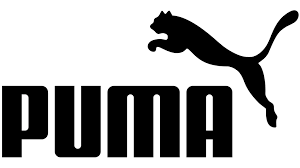

In [105]:
# Load the image
image = cv2.imread("/content/Puma.png")
cv2_imshow(image)

In [106]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [107]:
# Noise reduction
gray = cv2.GaussianBlur(gray, (5,5), 0)

In [108]:
# Edge detection
edged = cv2.Canny(gray,30,150)

In [109]:
# Find Contours
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [110]:
# Draw bounding boxes around contours
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(image,(x,y),(x+w, y+h), (0,255,0),2)

In [111]:
text = pytesseract.image_to_string(gray)

In [112]:
# Print detected text
print("Detected Text :", text)

Detected Text : puma



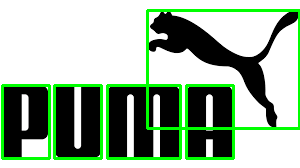

In [113]:
# Display the image with bounding boxes
cv2_imshow(image)

In [114]:
# List of brand names for matching
brand_names = ["Nike", "Adidas", "Puma", "Apple", "Samsung", "Amazon", "Cocacola"]


In [115]:
# Matchextracted text with brand names
detected_brands = [brand for brand in brand_names if brand.lower() in text.lower()]

print("Detected Brands:", detected_brands)

Detected Brands: ['Puma']
